<img src="https://seeklogo.com/images/R/Roche-logo-A80FCF9553-seeklogo.com.png" style="width:120px;height:70px">

# Roche Data Science - Home Study Case

By: Johnny Sin

Date: July 7-10, 2023

# Outline of the Project

## 1. Project Information
Scenario: Working as a Data Scientist and asked by Digital Transformation Managing Partner Simon to start a project that uses data collected on stroke patients over the past few years.

**About this Company:**
* Mission: developing innovative treatments for stroke, with an average of 11K patients helped annually.

## 2. Describing the data providing

Feature Information:
1. ID: Unique Identification Number
2. Gender: Male / Female / Other (Categorical Variable)
3. Age_In_Days: Indicates patient's age in days (numerical variable)
4. Hypertension: 1 - has hypertension | 0 - no hypertension (binomial variable)
5. Heart_Disease: 1 - has heart disease | 0 - no heart disease (binomial variable)
6. Ever_married: Yes - patient is / was ever married | No - patient has never been married (binomial variable)
7. Type_Of_Work: working status, 'self-employed', 'works in private firm', 'government job', 'still a child' (categorical variable)
8. Residence: Urban - patient currently lives in urban | Rural - patient lives in rural area (binomial variable)
9. Avg_Glucose: patient's average glucose level for the past 3 months
10. BMI: patient's current BMI score
11. Smoking_Status: indication of smoking habits (categorical variable)
12. **TARGET** Stroke: 1 - patient after stroke | 0 - no stroke (binomial variable)

Already looking at the features of the dataset, I will be using various classification algorithms for this project

## 3. Exploratory Data / Statistical Analysis

Here I will be looking at the various data descriptions and also feature engineering, along with figuring out the autocorrelative/multicollinearity of the features. 

### 3. 1 First importing the libraries / tools

In [265]:
# importing the necessary libraries and tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
%matplotlib inline

# importing the scikit-learn tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# importing the estimators to test
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

# importing the sklearn metrics for evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.metrics import f1_score, recall_score, precision_score

In [266]:
# importing the dataset
pd.set_option('display.max_columns', None)

df_main = pd.read_csv('Stroke_Prediction.csv', low_memory=False)
df_main.head()

,ID,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke
0,31153,Male,1104.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30650,Male,21204.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,17412,Female,2928.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,57008,Female,25578.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46657,Male,5128.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [267]:
# creating a copy of the original data for our working dataset
df = df_main.copy()

# looking at the features in single view
df.head().T

,0,1,2,3,4
ID,31153,30650,17412,57008,46657
Gender,Male,Male,Female,Female,Male
Age_In_Days,1104.0,21204.0,2928.0,25578.0,5128.0
Hypertension,0,1,0,0,0
Heart_Disease,0,0,0,0,0
Ever_Married,No,Yes,No,Yes,No
Type_Of_Work,children,Private,Private,Private,Never_worked
Residence,Rural,Urban,Urban,Rural,Rural
Avg_Glucose,95.12,87.96,110.89,69.04,161.28
BMI,18.0,39.2,17.6,35.9,19.1


### 3.2 Checking out the data information and more details

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              43400 non-null  int64  
 1   Gender          43400 non-null  object 
 2   Age_In_Days     43400 non-null  float64
 3   Hypertension    43400 non-null  int64  
 4   Heart_Disease   43400 non-null  int64  
 5   Ever_Married    43400 non-null  object 
 6   Type_Of_Work    43400 non-null  object 
 7   Residence       43400 non-null  object 
 8   Avg_Glucose     43400 non-null  float64
 9   BMI             41938 non-null  float64
 10  Smoking_Status  30108 non-null  object 
 11  Stroke          43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [269]:
df.describe()

,ID,Age_In_Days,Hypertension,Heart_Disease,Avg_Glucose,BMI,Stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36875.482604,15446.234931,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.890037,8334.882942,0.291235,0.212733,43.111751,7.770020,0.133103
min,176.000000,-16381.000000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18594.250000,8789.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36908.000000,16074.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,55054.250000,21923.250000,0.000000,0.000000,112.070000,32.900000,0.000000
max,73899.000000,264301.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [270]:
df.shape

(43400, 12)

Since we have less than 100K samples, for this study we will not be using SGD or Kernel approximation estimators

In [271]:
# Creating a categorical features list
cat_features = []
for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
        cat_features.append(label)
    
    
# creating a numerical features list
float_features = []
for label, content in df.items():
    if pd.api.types.is_float_dtype(content):
        float_features.append(label)
        
# creating a features list for already encoded features
int_features = []
for label, content in df.items():
    if pd.api.types.is_int64_dtype(content):
        int_features.append(label)

In [272]:
print(f' Categorical features are: {cat_features}, \n Numerical features are {float_features}, \n Encoded features are {int_features}')

 Categorical features are: ['Gender', 'Ever_Married', 'Type_Of_Work', 'Residence', 'Smoking_Status'], 
 Numerical features are ['Age_In_Days', 'Avg_Glucose', 'BMI'], 
 Encoded features are ['ID', 'Hypertension', 'Heart_Disease', 'Stroke']


### 3.3 Encoding the categorical features into Int64 values

In [273]:
for columns in cat_features:
    print(df[columns].value_counts(), '\n')

Gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64 

Ever_Married
Yes    27938
No     15462
Name: count, dtype: int64 

Type_Of_Work
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64 

Residence
Urban    21756
Rural    21644
Name: count, dtype: int64 

Smoking_Status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64 



In [274]:
# Manually Encoding features for visualization
df_tmp = df.copy()

# Encoding the Gender Column
df_tmp['Gender'] = df_tmp['Gender'].map({'Female': 0,
                                'Male': 1,
                                'Other': 2})
# Encoding the Ever_Married Column
df_tmp['Ever_Married'] = df_tmp['Ever_Married'].map({'Yes': 0,
                                                    'No': 1})
# Encoding the Type_Of_Work Column
df_tmp['Type_Of_Work'] = df_tmp['Type_Of_Work'].map({'Private': 0,
                                                    'Self-employed': 1,
                                                    'children': 2,
                                                    'Govt_job': 3,
                                                    'Never_worked': 4})
# Encoding the Residence Column
df_tmp['Residence'] = df_tmp['Residence'].map({'Urban': 0,
                                              'Rural': 1})
# Encoding the Smoking_Status Column
df_tmp['Smoking_Status'] = df_tmp['Smoking_Status'].map({'never smoked': 0,
                                                        'formerly smoked': 1,
                                                        'smokes': 2})

## I will be dropping the ID column because it is irrelevant:
df_tmp.drop('ID', axis = 1, inplace = True)

## I will also be replacing the 'Stroke' column name with 'Target'
df_tmp.rename({'Stroke': 'Target'}, axis = 1, inplace = True)

In [275]:
df_tmp.head()

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target
0,1,1104.0,0,0,1,2,1,95.12,18.0,NaN,0
1,1,21204.0,1,0,0,0,0,87.96,39.2,0.0,0
2,0,2928.0,0,0,1,0,0,110.89,17.6,NaN,0
3,0,25578.0,0,0,0,0,1,69.04,35.9,1.0,0
4,1,5128.0,0,0,1,4,1,161.28,19.1,NaN,0


Because we have an imbalanced dataset, I will try to randomly sample 700 of the `Target` = 0.

### 3.4 Checking for Null Values

In [276]:
df_tmp.isna().sum()

Gender                0
Age_In_Days           0
Hypertension          0
Heart_Disease         0
Ever_Married          0
Type_Of_Work          0
Residence             0
Avg_Glucose           0
BMI                1462
Smoking_Status    13292
Target                0
dtype: int64

In [277]:
df_tmp.isna().sum() / len(df_tmp)

Gender            0.000000
Age_In_Days       0.000000
Hypertension      0.000000
Heart_Disease     0.000000
Ever_Married      0.000000
Type_Of_Work      0.000000
Residence         0.000000
Avg_Glucose       0.000000
BMI               0.033687
Smoking_Status    0.306267
Target            0.000000
dtype: float64

Because almost 30 percent of the data is missing for the Smoking_status we can either:
1. impute the missing values with the mode
2. exclude the samples with missing values
3. **create a third category called "unknown"** 
Because the first two methods are rather extreme, we will choose the third method

*For the BMI we can simply exclude the samples without BMI recording, since only 3 percent of the samples have missing data*


In [389]:
# first seeing if there is any crucial data inconsistencies when removing all the BMI rows
df_bmi_missing = df[df.BMI.isna()]
df_bmi_missing.head()
df_bmi_missing['Stroke'].value_counts(), df_bmi_missing['Gender'].value_counts()

(Stroke
 0    1322
 1     140
 Name: count, dtype: int64,
 Gender
 Male      738
 Female    720
 Other       4
 Name: count, dtype: int64)

In [278]:
# dropping the missing values
df_tmp.dropna(subset=['BMI'], inplace = True)
df_tmp.isna().sum()

Gender                0
Age_In_Days           0
Hypertension          0
Heart_Disease         0
Ever_Married          0
Type_Of_Work          0
Residence             0
Avg_Glucose           0
BMI                   0
Smoking_Status    12866
Target                0
dtype: int64

In [279]:
# creating a new column for the Smoking_Status missing values column:
df_tmp['Smoking_Status'] = df_tmp['Smoking_Status'].fillna(3)
df_tmp['Smoking_Status'].value_counts()

Smoking_Status
0.0    15747
3.0    12866
1.0     7099
2.0     6226
Name: count, dtype: int64

In [280]:
print(f'The current dataframe is now: {len(df_tmp) / len(df_main) *100:.2f}% of the original dataframe')

The current dataframe is now: 96.63% of the original dataframe


### 3.5 Data visualization
Now that we imputed the missing values, encoded the categorical features, and created a new dataframe `df_dropped` we can start finding correlations between the features

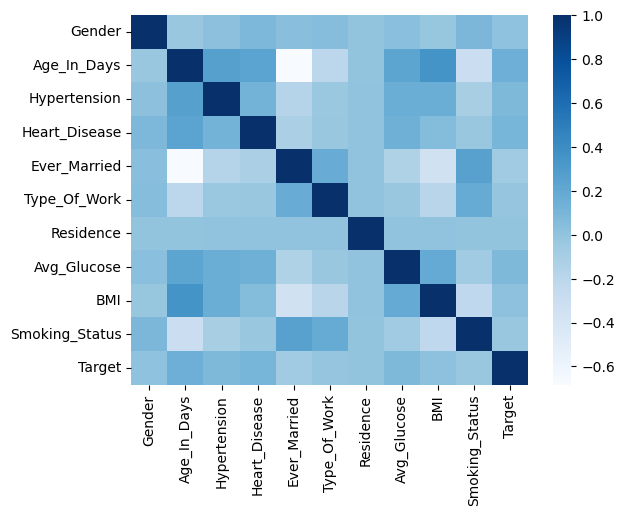

In [283]:
# Creating a correlation matrix
corr_matrix = df_tmp.corr()
corr_plot = sns.heatmap(corr_matrix,
                        annot = False,
                       cmap = 'Blues')
corr_plot;

In [284]:
# creating a correlation matrix using the dataframe to see the coefficients annotated
corr_pd = corr_matrix.style.background_gradient(cmap = 'Blues')
corr_pd

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target
Gender,1.000000,-0.031164,0.021353,0.080076,0.034772,0.046757,-0.002894,0.031903,-0.021981,0.089688,0.010015
Age_In_Days,-0.031164,1.000000,0.264162,0.239200,-0.682833,-0.206336,-0.000866,0.228067,0.353383,-0.303425,0.145440
Hypertension,0.021353,0.264162,1.000000,0.120806,-0.173041,-0.035075,0.001192,0.159130,0.161225,-0.103855,0.079479
Heart_Disease,0.080076,0.239200,0.120806,1.000000,-0.123489,-0.026938,0.004111,0.143555,0.057677,-0.026426,0.111102
Ever_Married,0.034772,-0.682833,-0.173041,-0.123489,1.000000,0.177889,0.004829,-0.148817,-0.342281,0.257022,-0.066794
Type_Of_Work,0.046757,-0.206336,-0.035075,-0.026938,0.177889,1.000000,0.004746,-0.027594,-0.183896,0.182125,-0.017008
Residence,-0.002894,-0.000866,0.001192,0.004111,0.004829,0.004746,1.000000,0.001154,0.003749,0.000303,-0.002315
Avg_Glucose,0.031903,0.228067,0.159130,0.143555,-0.148817,-0.027594,0.001154,1.000000,0.191295,-0.071360,0.077227
BMI,-0.021981,0.353383,0.161225,0.057677,-0.342281,-0.183896,0.003749,0.191295,1.000000,-0.229165,0.020285
Smoking_Status,0.089688,-0.303425,-0.103855,-0.026426,0.257022,0.182125,0.000303,-0.071360,-0.229165,1.000000,-0.031059


Seeing how maybe Hypertension and Heart Disease might be correlated, I'll look more into this

In [285]:
# creating a function for visualizing all the value counts:
def plot_features_value_counts(data, target_column = 'Target'):
    '''
    A function displays the value counts of every feature (10 columns) excluding the target
    '''
    # selecting only the dependent features
    data_X = data.drop(target_column, axis = 1)
    
    # setting up the figure
    fig = plt.figure(figsize = (20,10))
    # looping through 10 (for displaying 10 figures)
    for i, columns in enumerate(list(data_X.columns)):
        # create subplots (5 per row)
        ax = plt.subplot(2, 5, i+1)
        
        # Display the plot
        if pd.api.types.is_float_dtype(data_X[columns]):
            data_X[columns].plot.hist()
            plt.title(f'Histogram: {columns}')
        else:
            data_X[columns].value_counts().plot(kind='bar')
            plt.title(f'Value Counts: {columns}')
        
    fig.suptitle('Comprehensive Features Plot')          

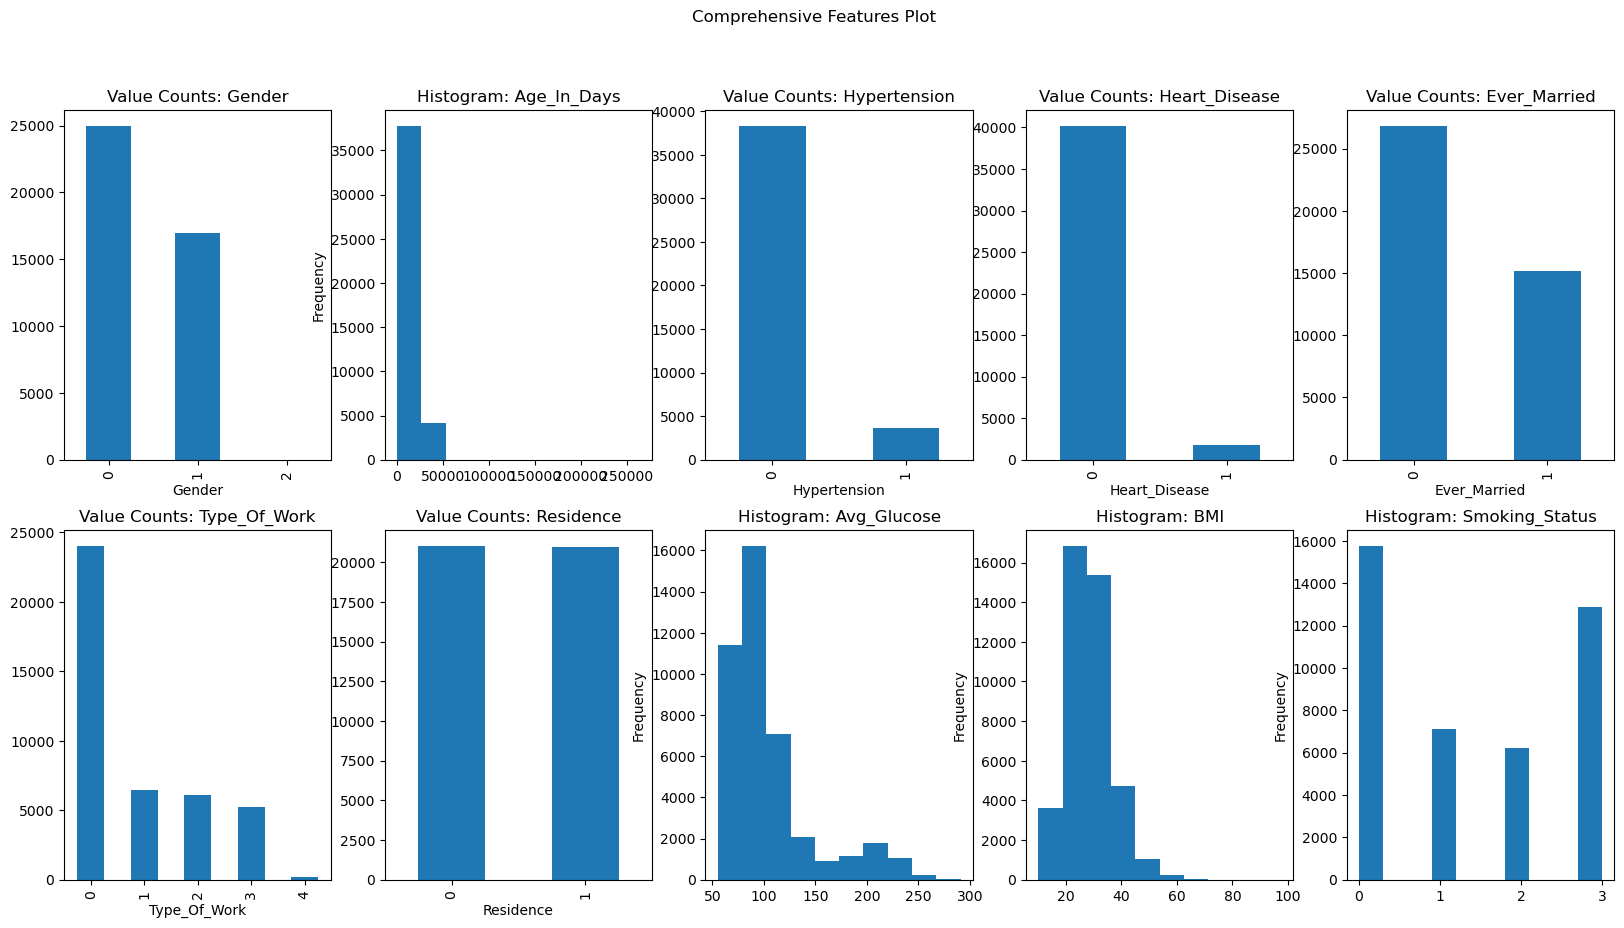

In [286]:
plot_features_value_counts(df_tmp)

### 3.5.1 Looking at the plots above, the histogram for the `Age_In_Days` seem to be pretty skewed. I will be investigating this feature for possible outlier removal

In [287]:
# more information about this column
df_tmp['Age_In_Days'].describe()

count     41938.000000
mean      15309.276131
std        8324.684852
min          30.200000
25%        8771.000000
50%       15733.000000
75%       21583.000000
max      264301.000000
Name: Age_In_Days, dtype: float64

In [288]:
print(f"Average Age of Samples in Years: {(np.mean(df_tmp['Age_In_Days']))/365} years", "\n",
     f"The Max Age is: {np.max(df_tmp['Age_In_Days'])/365} years", "\n",
     f"The Min Age is: {np.min(df_tmp['Age_In_Days'])/365} years")

Average Age of Samples in Years: 41.943222277896204 years 
 The Max Age is: 724.1123287671232 years 
 The Min Age is: 0.08273972602739726 years


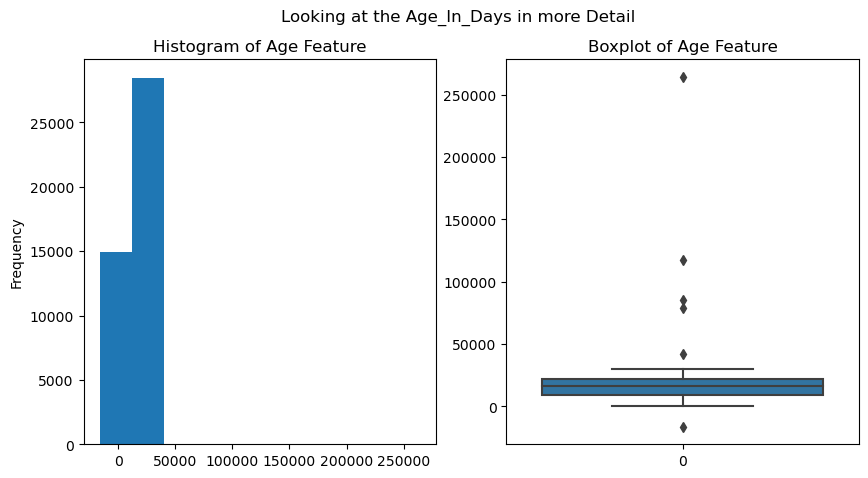

In [289]:
# looking at the histogram and boxplot a bit more closely
fig = plt.figure(figsize = (10,5))

# histogram subplot
ax = plt.subplot(1, 2, 1)
df['Age_In_Days'].plot.hist()
plt.title('Histogram of Age Feature')

# boxplot subplot
ax = plt.subplot(1, 2, 2)
sns.boxplot(df['Age_In_Days'])
plt.title('Boxplot of Age Feature')

fig.suptitle('Looking at the Age_In_Days in more Detail');

We will be using the Tukey's rule to remove outliers in the `Age_In_Days` column. Which is simply calculating the upper boundary as $$ Q3 + 1.5 IQR $$ and lower boundary as $$ Q1 - 1.5IQR$$ where the $ IQR = Q3 - Q1 $



In [290]:
# function for calculating the IQR:
def getting_IQR(series):
    '''
    Using the input pd.Series to output the IQR, and the upper_lim, lower_lim
    '''
    Q3 = series.quantile(0.75)
    Q1 = series.quantile(0.25)
    
    IQR = Q3 - Q1
    
    #lower boundary
    lower_lim = Q1 - (1.5 * IQR)
    
    # upper boundary
    upper_lim = Q3 + (1.5 * IQR)
    print(f'IQR = {IQR}, lower lim = {lower_lim}, upper_lim = {upper_lim}')
    
    return IQR, upper_lim, lower_lim    

In [291]:
IQR, upper_lim, lower_lim = getting_IQR(df['Age_In_Days'])

IQR = 13134.25, lower lim = -10912.375, upper_lim = 41624.625


In [292]:
df_tmp[df_tmp['Age_In_Days'] > upper_lim]

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target
1342,0,85451.0,0,0,1,0,1,65.30,22.1,2.0,0
3786,1,42349.0,0,0,1,4,0,64.29,16.7,3.0,0
8155,1,264301.0,0,0,1,3,0,80.31,25.0,3.0,0
18177,0,117179.0,0,0,0,3,1,84.39,38.9,0.0,0
26716,0,79231.0,0,0,1,0,1,77.62,23.1,1.0,0


Because these Age values do not make sense, we will consider them as outliers and remove them

In [293]:
df_tmp[df_tmp['Age_In_Days'] < lower_lim]

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target


In [294]:
df_tmp.drop(labels = list(df_tmp[df_tmp['Age_In_Days'] > upper_lim].index), axis = 0, inplace = True)

In [295]:
df_tmp[df_tmp['Age_In_Days'] > upper_lim]

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target


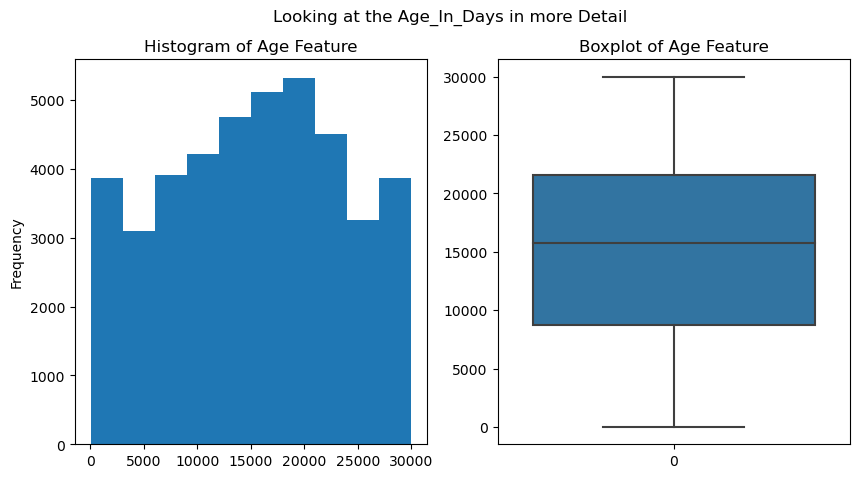

In [296]:
# looking at the histogram and boxplot a bit more closely
fig = plt.figure(figsize = (10,5))

# histogram subplot
ax = plt.subplot(1, 2, 1)
df_tmp['Age_In_Days'].plot.hist()
plt.title('Histogram of Age Feature')

# boxplot subplot
ax = plt.subplot(1, 2, 2)
sns.boxplot(df_tmp['Age_In_Days'])
plt.title('Boxplot of Age Feature')

fig.suptitle('Looking at the Age_In_Days in more Detail');

In [297]:
print(f'we have now a total of {len(df_tmp) / len(df) *100:.2f}% of data to work with!')

we have now a total of 96.62% of data to work with!


Now that we removed the outliers for the `Age_In_Days` column we can proceed with our analysis!

### 3.5.2 Class Distribution

Checking the `Target` column to see if our dataset is class-imbalanced

In [298]:
df_tmp['Target'].value_counts()

Target
0    41290
1      643
Name: count, dtype: int64

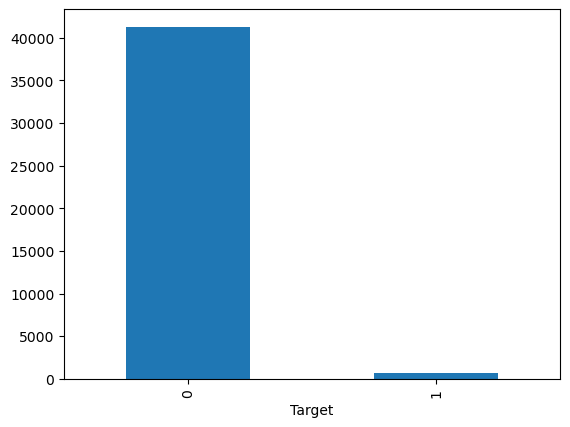

In [299]:
df_tmp['Target'].value_counts().plot(kind='bar');

Seeing how the classes are heavily imbalanced, I will resample the `Target` column to randomly balance out the classes

In [368]:
from sklearn.utils import resample

df_majority = df_tmp.query('Target == 0')
df_minority = df_tmp.query('Target == 1')
# Downsample the majority class
df_maj_downsampled = resample(df_majority,
                             replace = True,
                             n_samples = 700,
                             random_state = 42)
df_tmp = pd.concat([df_maj_downsampled, df_minority])

df_tmp.head()

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target
29270,0,15347.0,0,0,1,0,0,71.26,35.9,3.0,0
4979,0,9144.0,0,0,0,0,0,97.55,29.5,3.0,0
4732,0,11318.0,0,0,0,0,1,96.03,24.1,3.0,0
29358,0,10966.0,0,0,1,0,1,97.03,21.2,2.0,0
11513,0,16807.0,0,0,0,1,0,175.38,30.1,1.0,0


In [369]:
df_tmp['Target'].value_counts()

Target
0    700
1    643
Name: count, dtype: int64

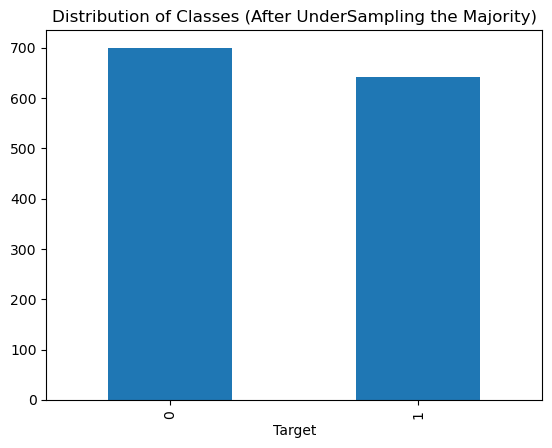

In [370]:
df_tmp['Target'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes (After UnderSampling the Majority)');

### 3.5.3 Looking at the numerical features and their relationship / correlation

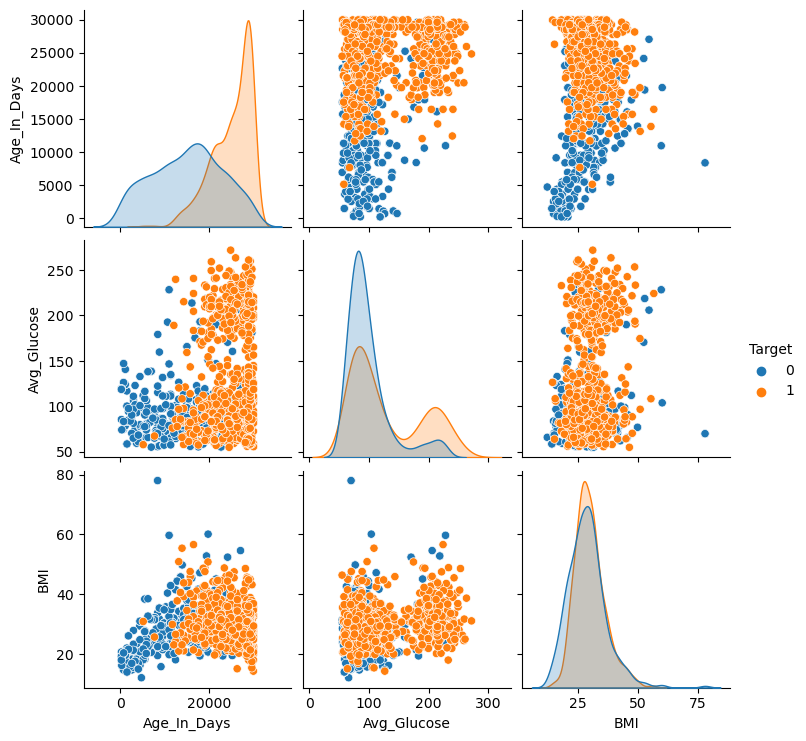

In [371]:
sns.pairplot(df_tmp, vars = float_features, hue = 'Target');

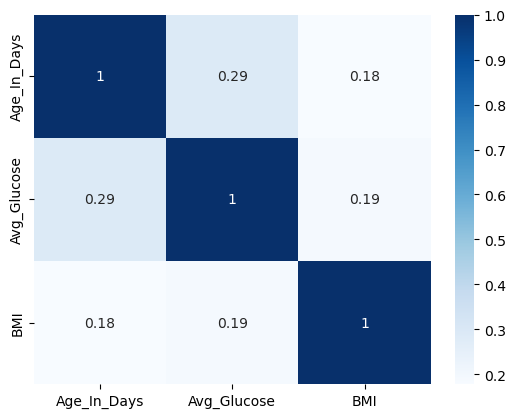

In [372]:
# getting the correlation matrix for just the numerical values
corr_mat_num = df_tmp[float_features].corr()
sns.heatmap(corr_mat_num, annot = True, cmap = 'Blues');

In [373]:
# creating a function for looking at feature variabilitiy
def feature_variability(data, column_x, column_y):
    '''
    Outputs the results of the OLS regression summary and visualizes this as a scatterplot
    '''
    # fitting the OLS variables
    corr_y = data[column_y]
    corr_x = data[column_x]

    x_stat = sm.add_constant(corr_x)
    results = sm.OLS(corr_y, x_stat).fit()
    
    
    # visualization:
    y_hat = results.params[0] + results.params[1]*corr_x
    # plotting Age_In_days vs Avg_Glucose
    fig, ax = plt.subplots(figsize=(5,5))
    ax = plt.scatter(corr_x, corr_y)
    fig = plt.plot(corr_x, y_hat, lw = 4, c = 'orange', label = 'regression line')
    plt.title(f'{column_y} vs {column_x}')
    plt.ylabel(column_y)
    plt.xlabel(column_x)
    plt.xticks(rotation=0)
    plt.show();
    
    return results.summary()

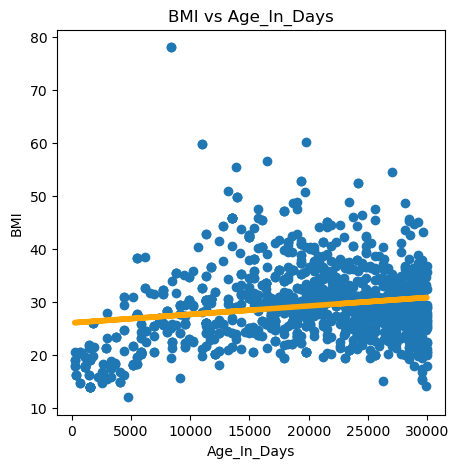

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     44.12
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           4.47e-11
Time:                        11:05:49   Log-Likelihood:                -4546.5
No. Observations:                1343   AIC:                             9097.
Df Residuals:                    1341   BIC:                             9107.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          26.1019      0.513     50.884      0.000      25.096      27.108
Age_In_Days     0.0002   2.39e-05      6.643      0.000       0.000       0.000
==============================================================================
Omnibus:                      387.881   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1593.642
Skew:                           1.328   Prob(JB):                         0.00
Kurtosis:                       7.628   Cond. No.                     5.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [374]:
feature_variability(data =df_tmp, column_x = 'Age_In_Days',
                   column_y = 'BMI')

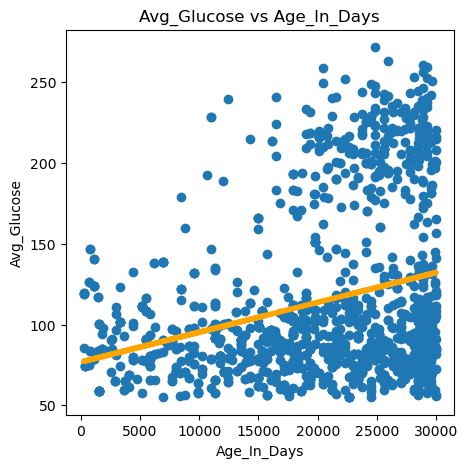

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Avg_Glucose   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     121.8
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           3.59e-27
Time:                        11:05:50   Log-Likelihood:                -7157.6
No. Observations:                1343   AIC:                         1.432e+04
Df Residuals:                    1341   BIC:                         1.433e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          76.8123      3.585     21.428      0.000      69.780      83.845
Age_In_Days     0.0018      0.000     11.037      0.000       0.002       0.002
==============================================================================
Omnibus:                      156.781   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.541
Skew:                           0.981   Prob(JB):                     1.57e-47
Kurtosis:                       2.928   Cond. No.                     5.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [375]:
feature_variability(df_tmp, column_x = 'Age_In_Days',
                   column_y = 'Avg_Glucose')

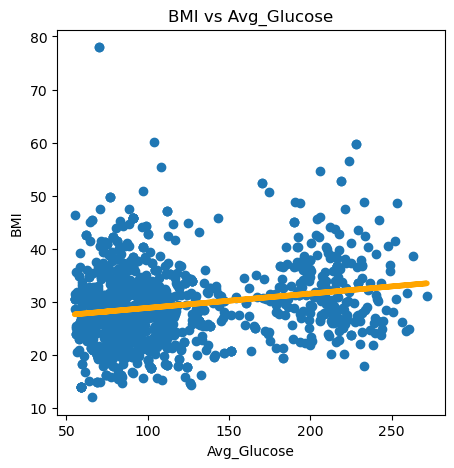

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     52.15
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           8.60e-13
Time:                        11:05:51   Log-Likelihood:                -4542.7
No. Observations:                1343   AIC:                             9089.
Df Residuals:                    1341   BIC:                             9100.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          26.1981      0.466     56.260      0.000      25.285      27.112
Avg_Glucose     0.0269      0.004      7.221      0.000       0.020       0.034
==============================================================================
Omnibus:                      320.663   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1203.438
Skew:                           1.116   Prob(JB):                    4.75e-262
Kurtosis:                       7.065   Cond. No.                         299.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [376]:
feature_variability(df_tmp, column_x = 'Avg_Glucose',
                   column_y = 'BMI')

### 3.5.4 Categorical Visualizations in relation with the Target feature

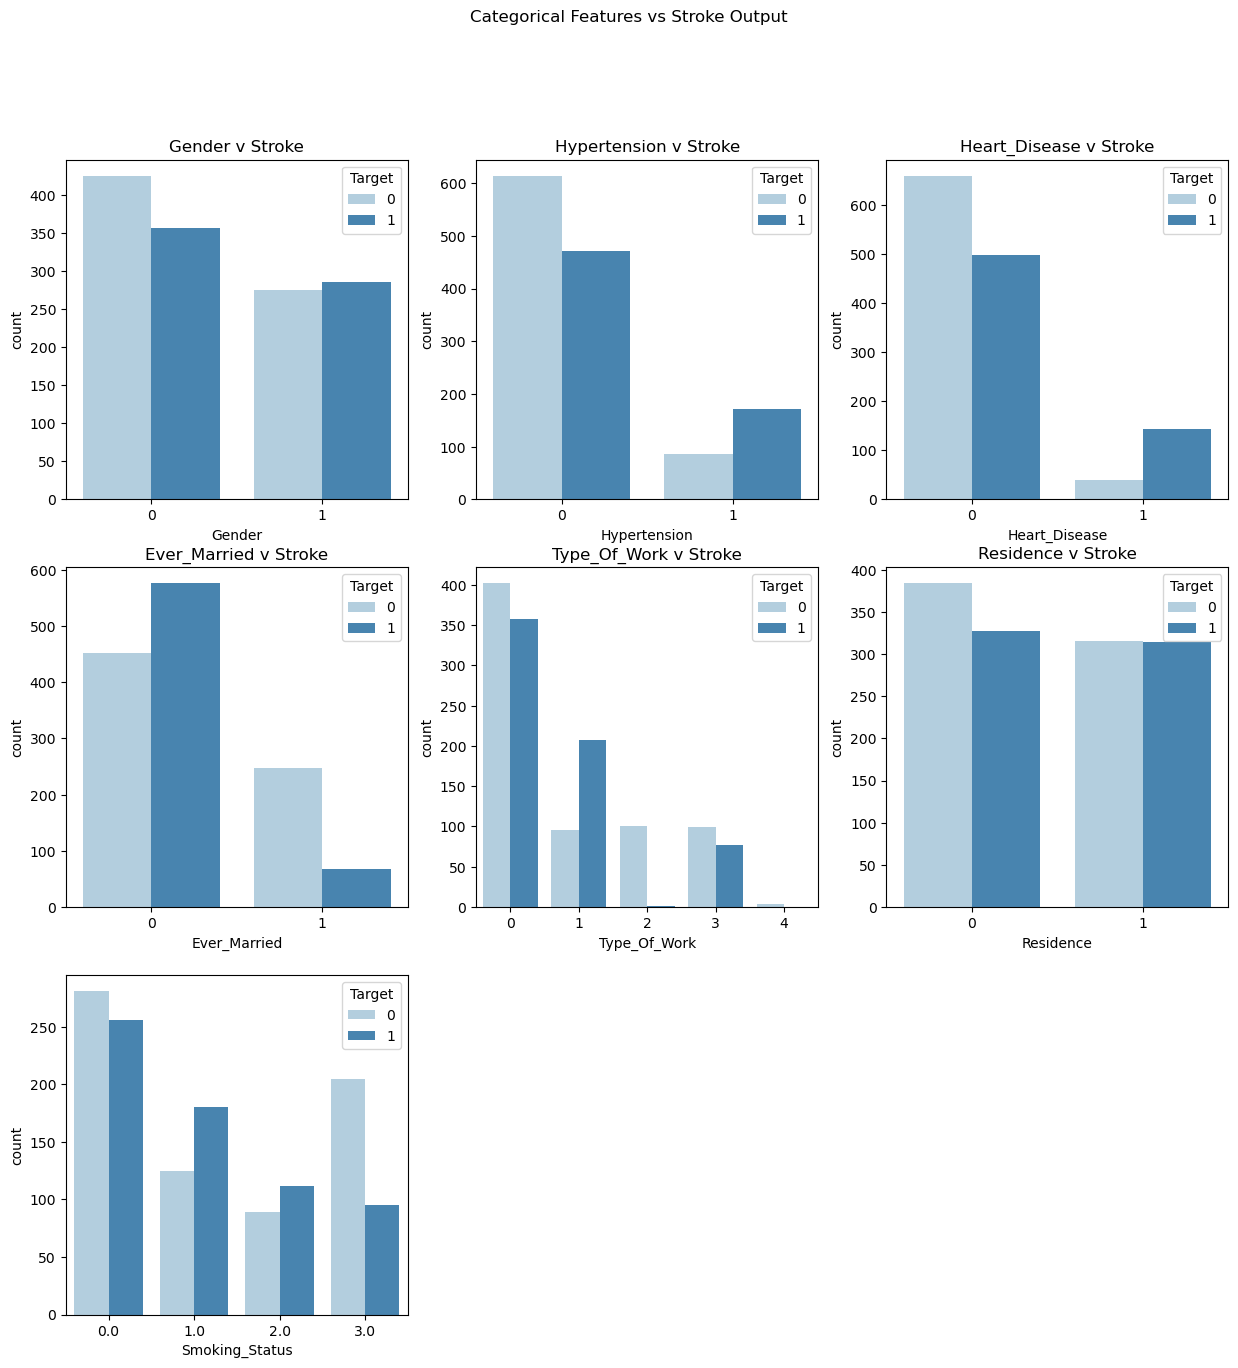

In [377]:
# plot of the categorical variables and the target feature
fig, ax = plt.subplots(ncols = 3,
                      nrows = 3,
                      figsize = (15,15))
fig.suptitle('Categorical Features vs Stroke Output')
sns.countplot(ax = ax[0,0], data = df_tmp, x = 'Gender',hue='Target', palette = 'Blues')
sns.countplot(ax = ax[0,1], data = df_tmp, x = 'Hypertension', hue='Target', palette = 'Blues')
sns.countplot(ax = ax[0,2], data = df_tmp, x = 'Heart_Disease',hue='Target', palette = 'Blues')
sns.countplot(ax = ax[1,0], data = df_tmp, x = 'Ever_Married', hue='Target', palette = 'Blues')
sns.countplot(ax = ax[1,1], data = df_tmp, x = 'Type_Of_Work', hue='Target', palette = 'Blues')
sns.countplot(ax = ax[1,2], data = df_tmp, x = 'Residence', hue='Target', palette = 'Blues')
sns.countplot(ax = ax[2,0], data = df_tmp, x = 'Smoking_Status', hue='Target', palette = 'Blues');
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])

# creating title for each figure
ax[0,0].set(title = 'Gender v Stroke')
ax[0,1].set(title = 'Hypertension v Stroke')
ax[0,2].set(title = 'Heart_Disease v Stroke')
ax[1,0].set(title = 'Ever_Married v Stroke')
ax[1,1].set(title = 'Type_Of_Work v Stroke')
ax[1,2].set(title = 'Residence v Stroke')
ax[2,1].set(title = 'Smoking_Status v Stroke');


## 4. Modeling: Finding the Best Estimator

For this case study we will be looking at these models:
1. LogisticRegression
2. RandomForestClassifier
3. KNeighborsClassifier
4. SVC
5. LinearSVC
6. XGBoost

### 4.1 Getting our Data Ready for Modeling

In [411]:
# creating a function that will organize our data and remove outliers 
# so that it will be ready for modeling
def preparing_data(data):
    '''
    This function will do a couple things: 
    1) Remove the 'BMI' column's missing values
    2) Drop the ID column
    3) Replacing the 'Stroke' colum name with 'Target'
    4) Remove the outlier rows in the 'Avg_Glucose'
    5) Create a new category in 'Smoking_Status' to include a 'Missing' value
    '''
    # creating a copy of the data
    data_tmp = data.copy()
    
    # 1. removing the 'BMI' missing values
    print(f"removing BMI missing values, total of {data_tmp['BMI'].isna().sum()}...")
    data_tmp.dropna(subset=['BMI'], inplace = True)
    
    ## 2. I will be dropping the ID column because it is irrelevant:
    print('Dropping the ID column...')
    data_tmp.drop('ID', axis = 1, inplace = True)
       
    ## 3. I will also be replacing the 'Stroke' column name with 'Target'
    print('Renaming the target column...')
    data_tmp.rename({'Stroke': 'Target'}, axis = 1, inplace = True)
          
    ## 4. Removing the outliers from the Age_In_Days column
    print('detecting outliers...')
    IQR, upper_lim, lower_lim = getting_IQR(data_tmp['Age_In_Days'])
    
    outlier_index = list(data_tmp[data_tmp['Age_In_Days'] > upper_lim].index)
    data_tmp.drop(labels =  outlier_index, inplace = True, axis = 0) 
    
    # 5. Encoding the Smoking_Status Column
    print('filling in the smoking status missing values...')
    data_tmp['Smoking_Status'] = data_tmp['Smoking_Status'].fillna('Missing')
    
    # Balancing the classes:
    df_majority = data_tmp.query('Target == 0')
    df_minority = data_tmp.query('Target == 1')
    # Downsample the majority class
    df_maj_downsampled = resample(df_majority,
                                 replace = True,
                                 n_samples = 700,
                                 random_state = 42)
    data_tmp = pd.concat([df_maj_downsampled, df_minority])
          
    return data_tmp   

In [412]:
df_model = preparing_data(df)

removing BMI missing values, total of 1462...
Dropping the ID column...
Renaming the target column...
detecting outliers...
IQR = 12812.0, lower lim = -10447.0, upper_lim = 40801.0
filling in the smoking status missing values...


In [413]:
df_model.head(10)

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target
16580,Female,21564.0,1,0,Yes,Private,Rural,73.45,35.8,never smoked,0
899,Male,29229.0,0,0,Yes,Private,Urban,78.78,24.0,formerly smoked,0
40084,Female,12457.0,0,0,Yes,Private,Urban,81.57,30.6,Missing,0
11850,Female,1510.0,0,0,No,children,Rural,58.69,14.0,Missing,0
6601,Female,20124.0,0,0,Yes,Private,Rural,206.17,31.7,never smoked,0
17682,Female,10232.0,0,0,No,Private,Urban,64.30,30.2,never smoked,0
39069,Female,18271.0,0,0,Yes,Private,Urban,76.15,22.2,never smoked,0
23066,Female,241.6,0,0,No,children,Urban,118.71,18.0,Missing,0
16823,Female,9509.0,0,0,No,Private,Urban,84.20,35.2,never smoked,0
43185,Female,18988.0,0,0,Yes,Self-employed,Rural,102.67,23.0,never smoked,0


In [414]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1343 entries, 16580 to 43318
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          1343 non-null   object 
 1   Age_In_Days     1343 non-null   float64
 2   Hypertension    1343 non-null   int64  
 3   Heart_Disease   1343 non-null   int64  
 4   Ever_Married    1343 non-null   object 
 5   Type_Of_Work    1343 non-null   object 
 6   Residence       1343 non-null   object 
 7   Avg_Glucose     1343 non-null   float64
 8   BMI             1343 non-null   float64
 9   Smoking_Status  1343 non-null   object 
 10  Target          1343 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 125.9+ KB


In [415]:
df_model.isna().sum()

Gender            0
Age_In_Days       0
Hypertension      0
Heart_Disease     0
Ever_Married      0
Type_Of_Work      0
Residence         0
Avg_Glucose       0
BMI               0
Smoking_Status    0
Target            0
dtype: int64

In [416]:
df_model.Target.value_counts()

Target
0    700
1    643
Name: count, dtype: int64

Looks like the `preparing_data` function worked! The missing value are taken care of and the column names are changed accordingly

### 4.2 Splitting our dataset into Training and Testing 

In [417]:
# creating a new X and y dataset 
X = df_model.drop('Target', axis = 1)
y = df_model['Target']

# splitting the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1074, 10), (269, 10), (1074,), (269,))

In [418]:
X_train.head(10)

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status
4962,Male,21575.0,0,0,Yes,Private,Rural,96.16,44.1,Missing
13446,Female,20815.0,0,1,Yes,Private,Urban,216.58,31.0,Missing
40203,Female,28878.0,0,1,Yes,Private,Urban,172.13,24.6,never smoked
37358,Male,21219.0,0,1,Yes,Private,Rural,63.26,29.6,never smoked
19828,Male,28870.0,1,0,Yes,Private,Urban,256.52,26.3,Missing
24477,Male,16807.0,0,0,No,Private,Urban,86.73,30.3,formerly smoked
21082,Male,11687.0,0,0,Yes,Private,Rural,99.05,24.5,never smoked
25676,Male,25557.0,0,0,Yes,Private,Urban,90.23,36.4,never smoked
14851,Female,28509.0,0,0,Yes,Private,Rural,78.81,19.6,Missing
19129,Female,8031.0,0,0,No,Private,Rural,73.63,24.3,Missing


In [419]:
y

16580    0
899      0
40084    0
11850    0
6601     0
        ..
43130    1
43148    1
43268    1
43304    1
43318    1
Name: Target, Length: 1343, dtype: int64

looks like our data splitting worked! 

### 4.3 Creating our Pipeline

Here I will be creating a modeling Pipeline with a ColumnTransformer to impute and encode the dataframe. 

Recall we have separate lists of columns:
1. `int_features` (already encoded)
2. `float_features` (no need for encoding)
3. `cat_features` (need encoding)

First we need to remove the `ID` and `Stroke` columns from the `int_features`

In [318]:
int_features.remove('ID')

In [319]:
int_features.remove('Stroke')

### 4.4 Creating a class to evaluate the models

In [420]:
import time

class ModelEvaluator():
    def __init__(self, model_name):
        '''
        model input should be in the format of a dictionary
        '''
        self._model_name = model_name


    def preprocessor(self, int_features, cat_features, float_features):
        '''
        preprocessing the input data for model
        '''
        self._int_features = int_features
        self._cat_features = cat_features
        self._float_features = float_features
        
        # creating the preprocessor pipeline 
        cat_pipe = Pipeline(steps=[
            ('OrdEncode', OrdinalEncoder()),
            ('scaler', StandardScaler())
        ])
        
        int_pipe = Pipeline(steps =[
            ('scaler', StandardScaler())
        ])
        
        num_pipe = Pipeline(steps = [
            ('scaler', StandardScaler())
        ])
        self._column_transformer = ColumnTransformer(transformers=[
            ('cat', cat_pipe, self._cat_features),
            ('num', num_pipe, self._float_features),
            ('int', int_pipe, self._int_features)
        ])
        
    def modeler(self, model, X_train, X_test, y_train, y_test):
        '''
        instantiating the model and fitting with X_train and y_train data
        '''
        np.random.seed(42) 
        
        self._model = model
        self._X_train = X_train
        self._X_test = X_test
        self._y_train = y_train
        self._y_test = y_test
       
        start_time = time.time()
        
        print(f'testing {self._model_name}...')
        
        # creating the model pipeline
        model_pipeline = Pipeline(steps=[
            ('col_transfomer', self._column_transformer),
            ('model', self._model )
        ])
        
        # instantiating the model
        self._model_pipeline = model_pipeline.fit(self._X_train, self._y_train)
        end_time = time.time()
        
        print(f'it took {end_time - start_time}s to fit this model')
        
    def model_scorer(self):
        '''
        evaluating the model
        '''
        np.random.seed(42)
        
        #scoring the model
        score_dict = {'accuracy score': self._model_pipeline.score(self._X_test, self._y_test),
                      'precision score': precision_score(self._y_test, self._model_pipeline.predict(self._X_test)),
                     'recall score': recall_score(self._y_test, self._model_pipeline.predict(self._X_test)),
                     'f1 score': f1_score(self._y_test, self._model_pipeline.predict(self._X_test))
                     }
        return score_dict
    
    def model_report(self):
        '''
        output of the classification report
        '''
        return classification_report(self._y_test, self._model_pipeline.predict(self._X_test))

### 4.5 Testing and Evaluating our Proposed Models

In [421]:
np.random.seed(42)
# testing a dictionary of models:
models_dict = {'LogisticRegression': LogisticRegression(),
              'KNN' : KNeighborsClassifier(),
              'SVC' : SVC(),
              'LinearSVC' : LinearSVC(),
              'RandomForest' : RandomForestClassifier(),
              'XGBoost': XGBClassifier()}

score_dict = {}
report_dict = {}

for model_name, model in models_dict.items():
    # instantiating the ModelEvaluator Class
    test = ModelEvaluator(model_name)
    
    # preprocessing the data
    test.preprocessor(int_features, cat_features, float_features)
    
    # fitting the model
    test.modeler(model, X_train, X_test, y_train, y_test)
    
    # getting the score outputs
    score_dict[model_name] = test.model_scorer()
    
    # report dict
    report_dict[model_name] = test.model_report()

testing LogisticRegression...
it took 0.028192996978759766s to fit this model
testing KNN...
it took 0.008336782455444336s to fit this model
testing SVC...
it took 0.03313469886779785s to fit this model
testing LinearSVC...
it took 0.04111218452453613s to fit this model
testing RandomForest...


/Users/johnnysin/opt/anaconda3/envs/env/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


it took 0.15518474578857422s to fit this model
testing XGBoost...
it took 0.07742595672607422s to fit this model


In [422]:
for model, report in report_dict.items():
    print(f'{model}')
    print(report)
    print('')

LogisticRegression
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       143
           1       0.76      0.89      0.82       126

    accuracy                           0.81       269
   macro avg       0.82      0.82      0.81       269
weighted avg       0.82      0.81      0.81       269


KNN
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       143
           1       0.75      0.82      0.78       126

    accuracy                           0.79       269
   macro avg       0.79      0.79      0.79       269
weighted avg       0.79      0.79      0.79       269


SVC
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       143
           1       0.75      0.90      0.82       126

    accuracy                           0.82       269
   macro avg       0.83      0.82      0.82       269
weighted avg       0.83      0.82      0.82  

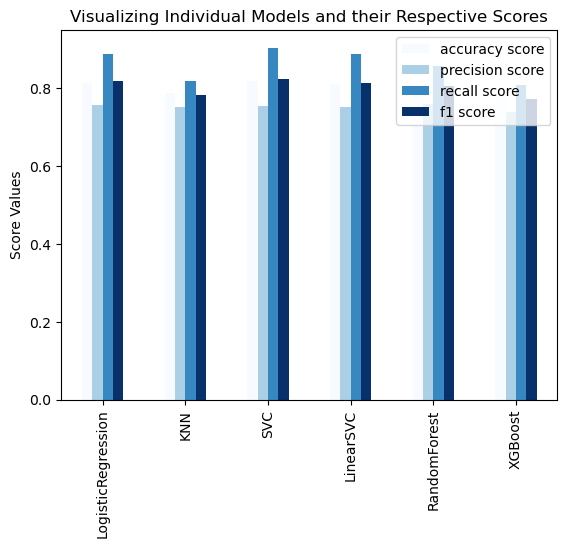

In [425]:
score_dict_pd.T.plot.bar(cmap = 'Blues')
plt.title('Visualizing Individual Models and their Respective Scores')
plt.ylabel('Score Values');

In [424]:
score_dict_pd = pd.DataFrame(score_dict)
score_dict_pd.T.style.background_gradient(cmap='Blues')

,accuracy score,precision score,recall score,f1 score
LogisticRegression,0.814126,0.756757,0.888889,0.817518
KNN,0.788104,0.751825,0.817460,0.783270
SVC,0.817844,0.754967,0.904762,0.823105
LinearSVC,0.810409,0.751678,0.888889,0.814545
RandomForest,0.806691,0.760563,0.857143,0.805970
XGBoost,0.776952,0.739130,0.809524,0.772727


Seeing how the RandomForest although has the highest precsion score, we are more interested in the Recall and F1 score which the SVC and LogisticRegression has the highest in those metrics.

Model Summary: (Ranked in recall / f1 score)
1. **SVC** (go into hyperparameter tuning for more investigation)
2. **LogisticRegression** (go into hyperparameter tuning for more investigation)
3. LinearSVC (stop for now)
4. RandomForest (stop for now)
5. KNN (stop for now)
6. XGBoostClassifier (stop for now)


## 5. Hyperparameter Tuning

## 6. Feature Importance and Summary

## Testing ModelEvaluator Class

In [325]:
# Testing ModelEvaluator Class

np.random.seed(42)
num_process = Pipeline(steps=[
    ('scaler', StandardScaler())
])
cat_process = Pipeline(steps = [
    ('encode', OrdinalEncoder()),
    ('scaler', StandardScaler())
])
int_process = Pipeline(steps = [
    ('scaler', StandardScaler())
])

column_transformer = ColumnTransformer(transformers=[
    ('cat', cat_process, cat_features),
     ('num', num_process, float_features),
    ('int', int_process, int_features)
])

model_pipeline = Pipeline(steps=[
    ('preprocess', column_transformer),
    ('model', RandomForestClassifier())
])
model_pipeline.fit(X_train, y_train)
print(f'Training score: {model_pipeline.score(X_train, y_train)} \nTesting score: {model_pipeline.score(X_test, y_test)}')

Training score: 1.0 
Testing score: 0.7806691449814126


This accuracy score is the same as the accuracy score supplied by the ModelEvaluator class